# Analysis & Validation

In [82]:
# All necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Pre-Processing Libraries
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Modelling Algorithms
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Testing
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [83]:
# Variables to store train and test dataset from Csv files
train_dataset = pd.read_csv("/content/sample_data/train.csv")
test_dataset = pd.read_csv("/content/sample_data/test.csv")

In [84]:
# read data into train dataset
train_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,"3,576.00",0.00,"6,715.00",49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,"1,283.00",371.00,"3,329.00",193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


In [85]:
# read data into test dataset
test_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,"2,823.00",0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,"6,652.00",0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez


In [86]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [87]:
train_dataset.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,"8,514.00","8,512.00","8,510.00","8,485.00","8,510.00","8,505.00"
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,"1,611.49",604.70,"1,136.71","1,145.72"
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,"14,327.00","29,813.00","23,492.00","22,408.00","24,133.00"


In [88]:
# check null values from train dataset
train_dataset.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [89]:
# check null values from test dataset
test_dataset.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [90]:
# overall length of train dataset
len(train_dataset)


8693

In [91]:
# overall length of test dataset
len(test_dataset)

4277

In [92]:
# Numeric Features
train_dataset.select_dtypes("Float64").columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [93]:
# Categorical Features
train_dataset.select_dtypes("O").columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [94]:
print(train_dataset.shape)
print(test_dataset.shape)

(8693, 14)
(4277, 13)


In [95]:
train_dataset.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
FoodCourt,8510.000000,458.077203,1611.489240,0.000000,0.000000,0.000000,76.000000,29813.000000
VRDeck,8505.000000,304.854791,1145.717189,0.000000,0.000000,0.000000,46.000000,24133.000000
Spa,8510.000000,311.138778,1136.705535,0.000000,0.000000,0.000000,59.000000,22408.000000
RoomService,8512.000000,224.687617,666.717663,0.000000,0.000000,0.000000,47.000000,14327.000000
ShoppingMall,8485.000000,173.729169,604.696458,0.000000,0.000000,0.000000,27.000000,23492.000000
Age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000


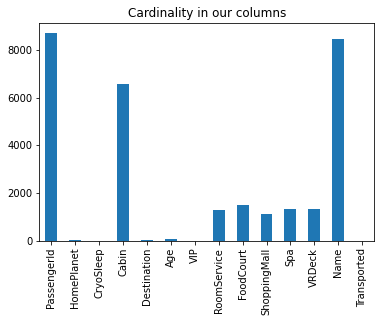

In [96]:
# Check cardinality in columns
train_dataset.nunique().plot.bar(title="Cardinality in our columns")

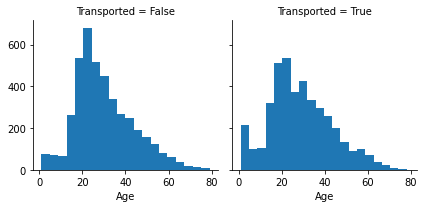

In [97]:
# First, let's get a handle on how numerical features and solution goals are connected (Transported).
# Banding or ranges help reveal patterns when analysing continuous numerical variables like Age, making histograms useful for analysis. Bins or bands may be used in a histogram to display the range of values in a sample.
# Band-specific queries (Such as "Were infants more likely to survive?") may now be answered.
# The x-axis of a histogram represents the total number of samples or riders.
# The rate of transport was highest for those under the age of 40.
# Traveled with the oldest (age 80) of our passengers.
# Many people in their twenties and twenties-and-up were not Transported.
# The vast majority of travellers are under the age of 35.


g = sns.FacetGrid(train_dataset[train_dataset['Age'] > 0], col='Transported')
g.map(plt.hist, 'Age', bins=20)

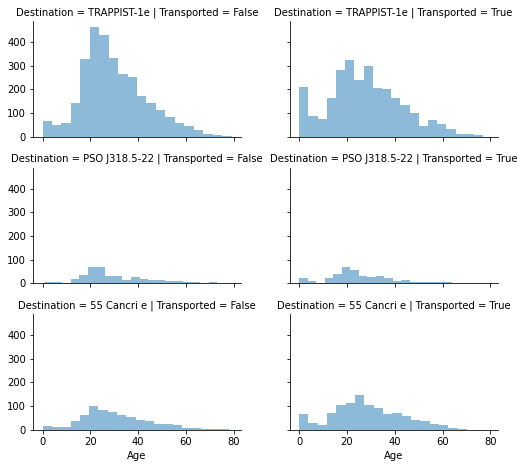

In [98]:
# One graphic may be used to correlate many features. Numeric and category characteristics using numbers are helpful.
# Destination=TRAPPIST-1e had most passengers, however most didn't travel.
# Our classification prediction #2 is confirmed: infants are usually sent to PSO J318.5-22 and 55 Cancri. 
# Our #2 classification premise is supported: most Destination=TRAPPIST-1e passengers survived. Passenger age distribution varies by destination, confirming premise 3.

grid = sns.FacetGrid(train_dataset, col='Transported', row='Destination', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


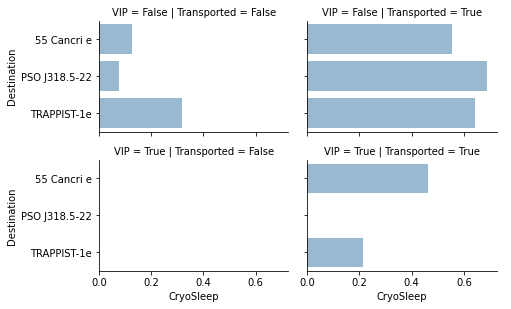

In [99]:
# We may now link category characteristics to our solution aim.
# VIP passengers had a worse Transported rate. #1 classifying confirmed
# CryoSleep=True had a higher Transported rate for VIP passengers than CryoSleep=False. 2. Decisions.
# Make model training VIP.
# Finish CryoSleep model training.
# Category: HomePlanet, CryoSleep, Cabin,Destination, and VIP.
grid = sns.FacetGrid(train_dataset, row='VIP', col='Transported', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'CryoSleep', 'Destination', alpha=.5, ci=None)
grid.add_legend()

# Preprocessing

In [ ]:
train_dataset.groupby(by=["Cabin"]).sum()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Cabin,,,,,,,
A/0/P,52.0,0.0,2344.0,0.0,65.0,6898.0,1
A/0/S,91.0,43.0,4859.0,371.0,10044.0,242.0,0
A/1/S,67.0,279.0,605.0,3374.0,286.0,3.0,3
A/10/P,30.0,0.0,3628.0,289.0,1737.0,4987.0,0
A/10/S,20.0,2.0,4754.0,0.0,246.0,31.0,1
...,...,...,...,...,...,...,...
T/0/P,35.0,415.0,1328.0,0.0,14.0,60.0,0
T/1/P,42.0,0.0,1829.0,2.0,3133.0,2447.0,0
T/2/P,33.0,0.0,28.0,0.0,6841.0,543.0,0


In [ ]:
train_dataset[['CD','CN','CS']] = train_dataset['Cabin'].str.split('/', expand=True)
test_dataset[['CD','CN','CS']] = test_dataset['Cabin'].str.split('/', expand=True)

In [ ]:
train_dataset.groupby(by=["CD"])["PassengerId"].count()

CD
A     256
B     779
C     747
D     478
E     876
F    2794
G    2559
T       5
Name: PassengerId, dtype: int64

CN
0       18
1       15
10      12
100     12
1000     6
        ..
995      3
996      1
997      2
998      4
999      6
Name: PassengerId, Length: 1817, dtype: int64


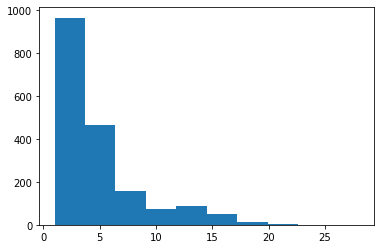

In [ ]:
print(train_dataset.groupby(by=["CN"])["PassengerId"].count())

plt.hist(train_dataset.groupby(by=["CN"])["PassengerId"].count())
plt.show()

train_dataset["CN"] = pd.to_numeric(train_dataset["CN"])
test_dataset["CN"] = pd.to_numeric(test_dataset["CN"])

In [ ]:
train_dataset.groupby(by=["CS"])["PassengerId"].count()

CS
P    4206
S    4288
Name: PassengerId, dtype: int64

In [ ]:
# Drop original cabin column
train_dataset = train_dataset.drop(['Cabin'], axis=1)
test_dataset = test_dataset.drop(['Cabin'], axis=1)

# Drop name column
train_dataset = train_dataset.drop(['Name'], axis=1)
test_dataset = test_dataset.drop(['Name'], axis=1)

In [ ]:
# Detect Missing Values
Missing_values = {'Null_values': train_dataset.isnull().sum(), 'Null_percentage': train_dataset.isnull().sum()/len(train_dataset)}
pd.DataFrame(data = Missing_values )

,Null_values,Null_percentage
PassengerId,0,0.000000
HomePlanet,201,0.023122
CryoSleep,217,0.024963
Destination,182,0.020936
Age,179,0.020591
VIP,203,0.023352
RoomService,181,0.020821
FoodCourt,183,0.021051
ShoppingMall,208,0.023927
Spa,183,0.021051


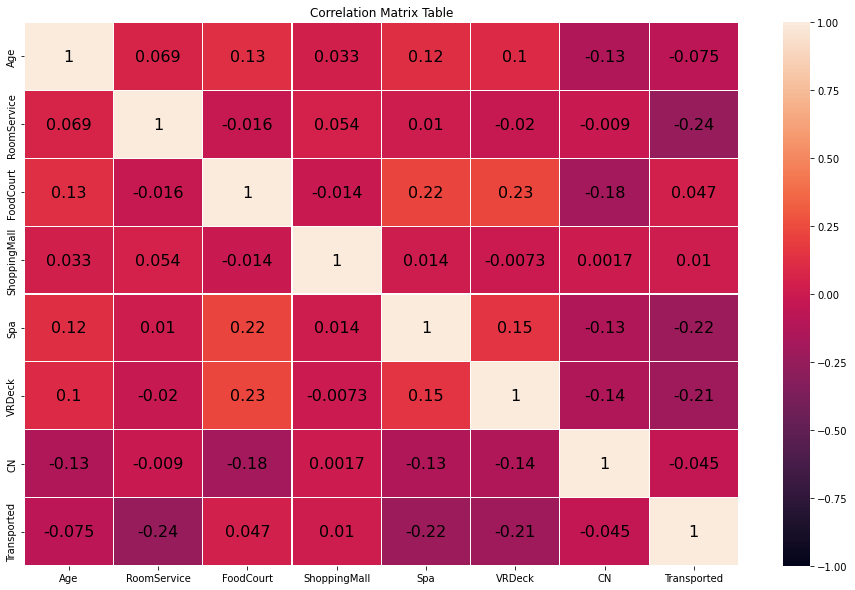

In [ ]:
categorical_features = list(train_dataset.select_dtypes(include = [object]).columns)
numeric_features = list(train_dataset.select_dtypes(include = [np.int64,np.float64]).columns)
boolean_features = list(train_dataset.select_dtypes(include = [bool]).columns)

# Heatmap for correlations between numerical variables and the dependent variable
pd.options.display.float_format = "{:,.2f}".format

corr_matrix = train_dataset[numeric_features + boolean_features].corr()

plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 16, "color": "black"},annot=True)
plt.title("Correlation Matrix Table")
plt.show()

In [ ]:
# Filling in missing VIP values with False
train_dataset["VIP"].fillna(False, inplace = True)
test_dataset["VIP"].fillna(False, inplace = True)
# Filling in missing CryoSleep values with False
train_dataset["CryoSleep"].fillna(False, inplace = True)
test_dataset["CryoSleep"].fillna(False, inplace = True)



# Since fewer than 3% of data is missing from every column,
# I'm using the median to fill in missing numerical values and the mode for missing categorical data.

for col in categorical_features:
    train_dataset[col].fillna(train_dataset[col].mode()[0],inplace = True)
    test_dataset[col].fillna(test_dataset[col].mode()[0],inplace = True)

for col in numeric_features:
    train_dataset[col].fillna(train_dataset[col].median(),inplace = True)
    test_dataset[col].fillna(test_dataset[col].median(),inplace = True)
for i in [train_dataset,test_dataset]:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  CD            8693 non-null   object 
 13  CN            8693 non-null   float64
 14  CS            8693 non-null   object 
dtypes: bool(3), float64(7), object(5)
memory usage: 840.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 

In [ ]:
# Check null values in train dataset
train_dataset.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
CD              0
CN              0
CS              0
dtype: int64

In [ ]:
# Check null values in test dataset
test_dataset.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
CD              0
CN              0
CS              0
dtype: int64

In [ ]:
# Variables with categories encoded
Main_Column = ["HomePlanet", "CryoSleep", "Destination", "VIP", "CD", "CS"]

One_Hot_Encoding = OneHotEncoder(drop = 'first', sparse=False)

One_Hot_Encoding.fit(train_dataset[Main_Column])

OneHotEncoder(drop='first', sparse=False)

In [ ]:
One_Hot_Encoding.categories_

[array(['Earth', 'Europa', 'Mars'], dtype=object),
 array([False,  True]),
 array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'], dtype=object),
 array([False,  True]),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], dtype=object),
 array(['P', 'S'], dtype=object)]

In [ ]:
train_One_Hot_Encoding = pd.DataFrame(One_Hot_Encoding.transform(train_dataset[Main_Column]))
test_One_Hot_Encoding = pd.DataFrame(One_Hot_Encoding.transform(test_dataset[Main_Column]))

train_One_Hot_Encoding.index = train_dataset.index
test_One_Hot_Encoding.index = test_dataset.index

numeric_train = train_dataset.drop(Main_Column, axis=1)
numeric_test = test_dataset.drop(Main_Column, axis=1)

In [ ]:
train_One_Hot_Encoding  = train_One_Hot_Encoding .set_axis(['Home Europa', 'Home Mars', 'CryoSleep', 'PSO J318.5-22', \
                    'TRAPPIST-1e', 'VIP', 'B', 'C', 'D', \
                    'E', 'F', 'G', 'T', 'Starboard side'], axis=1, inplace=False)


test_One_Hot_Encoding  = test_One_Hot_Encoding .set_axis(['Home Europa', 'Home Mars', 'CryoSleep', 'PSO J318.5-22', \
                    'TRAPPIST-1e', 'VIP', 'B', 'C', 'D', \
                    'E', 'F', 'G', 'T', 'Starboard side'], axis=1, inplace=False)

In [ ]:
N_train = pd.concat([numeric_train, train_One_Hot_Encoding], axis=1)
N_test = pd.concat([numeric_test, test_One_Hot_Encoding], axis=1)
# After Encoding train dataset
N_train.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CN,Home Europa,...,TRAPPIST-1e,VIP,B,C,D,E,F,G,T,Starboard side
0,0001_01,39.00,0.00,0.00,0.00,0.00,0.00,False,0.00,1.00,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0002_01,24.00,109.00,9.00,25.00,549.00,44.00,True,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
2,0003_01,58.00,43.00,"3,576.00",0.00,"6,715.00",49.00,False,0.00,1.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,0003_02,33.00,0.00,"1,283.00",371.00,"3,329.00",193.00,False,0.00,1.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,0004_01,16.00,303.00,70.00,151.00,565.00,2.00,True,1.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00


In [ ]:
# After Encoding test dataset
N_test.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CN,Home Europa,Home Mars,...,TRAPPIST-1e,VIP,B,C,D,E,F,G,T,Starboard side
0,0013_01,27.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
1,0018_01,19.00,0.00,9.00,0.00,"2,823.00",0.00,4.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
2,0019_01,31.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
3,0021_01,38.00,0.00,"6,652.00",0.00,181.00,585.00,1.00,1.00,0.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
4,0023_01,20.00,10.00,0.00,635.00,0.00,0.00,5.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00


# Model

In [ ]:
N_train.shape

(8693, 23)

In [ ]:
 # drop Transported column from x_train and store in y_train  for predictions
X_train = N_train.drop(['Transported'] , axis = 1)
y_train = N_train['Transported']


In [ ]:
# define model classes using different classifier for training dataset
modelclasses = [
    ["Logistic Regression", LogisticRegression],
    ["Decision Tree Classifier", DecisionTreeClassifier],
    ["Random Forest Classifier", RandomForestClassifier],
    ["K Neighbors Classifier", KNeighborsClassifier],
    ["Naive Bayes", GaussianNB],
    ["Support Vector Machines", SVC]
]

In [ ]:
insights = []
for modelname, Model in modelclasses:
    model = Model()
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)        
    insights.append((modelname, score))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
insights.sort(key=lambda x:x[-1], reverse=True)
insights

pd.DataFrame(insights, columns=["Model Name", "Score"])

,Model Name,Score
0,Decision Tree Classifier,1.00
1,Random Forest Classifier,1.00
2,Logistic Regression,0.78
3,K Neighbors Classifier,0.76
4,Naive Bayes,0.67
5,Support Vector Machines,0.54


In [ ]:
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold, StratifiedKFold

from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [ ]:
final_model = DecisionTreeClassifier().fit(X_train, y_train)
final_model.score(X_train, y_train)

1.0

In [ ]:
final_model1 = RandomForestClassifier().fit(X_train, y_train)
final_model1.score(X_train, y_train)

1.0

In [ ]:
final_model2 = SGDClassifier().fit(X_train, y_train)
final_model2.score(X_train, y_train)

0.5693086391349361

In [ ]:
final_model3 = KNeighborsClassifier().fit(X_train, y_train)
final_model3.score(X_train, y_train)

0.7599217761417232

In [ ]:
final_model4 =  AdaBoostClassifier().fit(X_train, y_train)
final_model4.score(X_train, y_train)

0.7993788105372138

In [ ]:
final_model5 = CalibratedClassifierCV().fit(X_train, y_train)
final_model5.score(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6481076728402163

In [ ]:
# Creating some predictions.
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(final_model, X_train, y_train, cv=3)
  

In [ ]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[3096, 1219],
       [1878, 2500]])

In [ ]:
id_col = test_dataset.PassengerId
predictions = pd.Series(final_model.predict(N_test), name='Transported')

In [ ]:
df=pd.concat([id_col, predictions], axis=1)
df.to_csv("/content/sample_data/sample_submission.csv", index=False)
df.head(15)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
5,0027_01,True
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,True


# Ensembles Model

In [ ]:
X_train = N_train.drop(['Transported','PassengerId'] , axis = 1)
y_train = N_train['Transported']


In [ ]:
XX_train , XX_test , yy_train , yy_test = train_test_split(X_train, 
                                                       y_train, 
                                                       random_state = 42,
                                                       test_size = 0.33)

In [ ]:
parameters = {
    "learning_rate": sp_randFloat(),
    "max_depth":sp_randInt(4, 10),
    "subsample": sp_randFloat(),
    "n_estimators":sp_randInt(10,1000)
    }

#Evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

xgb_clf = xgb.XGBClassifier()

#Random search procedure
random_search = RandomizedSearchCV(estimator = xgb_clf, param_distributions = parameters, cv = cv, n_iter = 10, n_jobs = -1)

#Executing the random search
random_result = random_search.fit(XX_train, yy_train)

#Best score and configuration
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_)) 


Best: 0.793904 using {'learning_rate': 0.42631852868443665, 'max_depth': 9, 'n_estimators': 586, 'subsample': 0.939564177973994}


In [ ]:

X_valid = N_test.drop(['PassengerId'], axis = 1)
y_valid = np.empty([4277,], dtype=bool)

In [ ]:
# fitting data into model
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', 
                            learning_rate = 0.012052102010738919, 
                            max_depth = 5, 
                            n_estimators = 647, 
                            subsample = 0.524706494869144,
                            seed = 42)

xgb_clf.fit(XX_train, yy_train)

predictions = xgb_clf.predict(XX_test)

accuracy = float(np.sum(predictions==yy_test))/yy_test.shape[0]

print("Extreme gradient boosting accuracy: %f" % (accuracy), "\n", \
      "Feature Importances", "\n", pd.DataFrame(zip(XX_test.columns, xgb_clf.feature_importances_)))

xgb_pred_val = xgb_clf.predict(X_valid)

Extreme gradient boosting accuracy: 0.799233 
 Feature Importances 
                  0    1
0              Age 0.02
1      RoomService 0.04
2        FoodCourt 0.03
3     ShoppingMall 0.02
4              Spa 0.04
5           VRDeck 0.04
6               CN 0.02
7      Home Europa 0.05
8        Home Mars 0.02
9        CryoSleep 0.48
10   PSO J318.5-22 0.01
11     TRAPPIST-1e 0.02
12             VIP 0.01
13               B 0.02
14               C 0.02
15               D 0.01
16               E 0.03
17               F 0.02
18               G 0.08
19               T 0.00
20  Starboard side 0.03


In [ ]:
lgbm_clf = LGBMClassifier()
#Random search procedure
random_search = RandomizedSearchCV(estimator = lgbm_clf, param_distributions = parameters, cv = cv, n_iter = 10, n_jobs = -1)

#Executing the random search
random_result = random_search.fit(XX_train, yy_train)

#Best score and configuration
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_)) 



In [ ]:
lgbm_clf = LGBMClassifier(learning_rate = 0.05112404562350914, 
                            max_depth = 6, 
                            n_estimators = 104, 
                            subsample = 0.7171778425300053,
                            seed = 42)

lgbm_clf.fit(XX_train, yy_train)

predictions = lgbm_clf.predict(XX_test)

accuracy = float(np.sum(predictions==yy_test))/yy_test.shape[0]

print("Light gradient boosting accuracy: %f" % (accuracy), "\n", \
      "Feature Importances", "\n", pd.DataFrame(zip(XX_test.columns, lgbm_clf.feature_importances_)))

lgbm_pred_val = lgbm_clf.predict(X_valid)

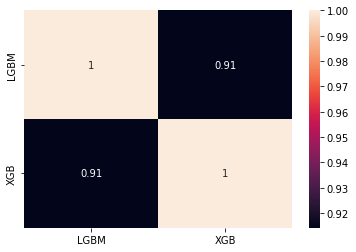

In [ ]:
final_model_1 = lgbm_clf.fit(X_train, y_train)
final_model_2 = xgb_clf.fit(X_train, y_train)

test_LGBM = pd.Series(final_model_1.predict(X_valid), name="LGBM")
test_XGB = pd.Series(final_model_2.predict(X_valid), name="XGB")

# Concatenate all classifier results
ensemble_results = pd.concat([test_LGBM,test_XGB],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)



In [ ]:
# apply soft voting on different model into a single model for probabilities
from sklearn.ensemble import  VotingClassifier
LGBM=final_model_1
XGB=final_model_2


votingC = VotingClassifier([('gboost', XGB),('lgbm', LGBM)],  voting='soft', n_jobs=4)

votingC = votingC.fit(XX_train, yy_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = votingC.predict(XX_test)
print(classification_report(yy_test, y_pred))

              precision    recall  f1-score   support

       False       0.82      0.77      0.80      1424
        True       0.79      0.83      0.81      1445

    accuracy                           0.80      2869
   macro avg       0.80      0.80      0.80      2869
weighted avg       0.80      0.80      0.80      2869



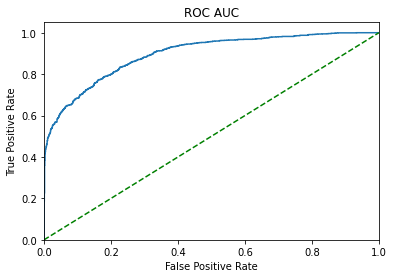

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
xgb_roc_auc = roc_auc_score(yy_test, votingC.predict(XX_test))
fpr, tpr, thresholds = roc_curve(yy_test, votingC.predict_proba(XX_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


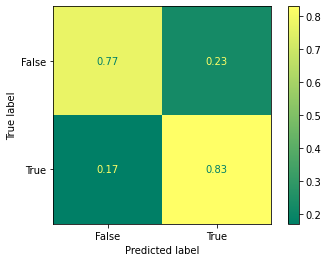

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(votingC,
                      XX_test,
                      yy_test,
                      cmap = "summer",
                      normalize = "true");

In [ ]:
id_col = test_dataset.PassengerId
test_Survived = pd.Series(votingC.predict(N_test._get_numeric_data()), name="Transported")

results = pd.concat([id_col,test_Survived],axis=1)

results.to_csv("ensemble_python_voting.csv",index=False)

In [ ]:
results.head(5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
